# Import Required Libraries
Import the necessary libraries, including pandas and matplotlib.

In [34]:
import numpy as np
import pandas as pd  

import matplotlib.pyplot as plt 
import seaborn as sns

# Read Run Files
Read the two run files into pandas DataFrames.

In [43]:
# Read Run Files
run_folder = '../docs/resources/runs/'
# baseline : BengezzouIdrissMezianeGhilas_1_bm25_article_stop671_porter_k1_b0.5.txt

# Read the first run file into a pandas DataFrame
df1 = pd.read_csv(run_folder + 'BengezzouIdrissMezianeGhilas_1_bm25_article_stop671_porter_k1_b0.5.txt', sep=' ')

# Read the second run file into a pandas DataFrame
df2 = pd.read_csv(run_folder + 'BengezzouIdrissMezianeGhilas_5_ltc_article_stop671_porter.txt', sep=' ')


# Compare Run Files
Compare the order of the third column in the two DataFrames and identify the differences.

In [44]:
# we need to compare the two dataframes (only the third column)
df1_col3 = df1.iloc[:, 2]
df2_col3 = df2.iloc[:, 2]

# Compare the two columns and identify the differences
differences = df1_col3.compare(df2_col3)
differences.head()

,self,other
0,627.0,780.0
1,780.0,627.0
8,775.0,612.0
9,627.0,1164.0
10,753.0,775.0


# Calculate Statistics
Calculate statistics on the differences, such as the number of changes, the percentage of changes, or the average change magnitude.


1. Number of Changes: This statistic represents the total count of differences between the two DataFrames. It indicates how many values in the third column of the DataFrames differ from each other.

2. Percentage of Changes: This statistic calculates the percentage of changes in the third column of the DataFrames. It is calculated by dividing the number of changes by the total number of values in the third column and multiplying by 100. It provides a measure of the overall impact of the differences.

3. Average Change Magnitude: This statistic calculates the average magnitude of the changes in the third column of the DataFrames. It represents the average absolute difference between the corresponding values in the two DataFrames. It gives an indication of the typical size of the differences.


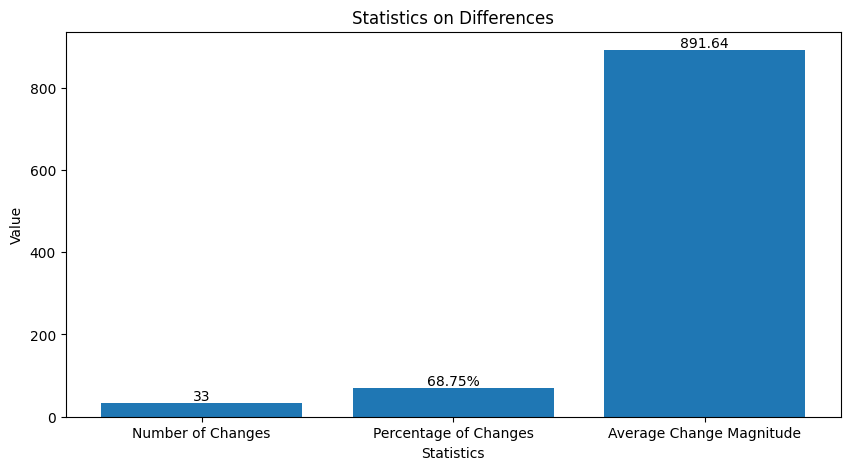

In [45]:
# Calculate the number of changes
num_changes = len(differences)

# Calculate the percentage of changes
percent_changes = (num_changes / len(df1_col3)) * 100

# Calculate the average change magnitude
avg_change_magnitude = differences['self'].mean()

# Create a bar chart to display the statistics
plt.bar(['Number of Changes', 'Percentage of Changes', 'Average Change Magnitude'], [num_changes, percent_changes, avg_change_magnitude])

plt.gcf().set_size_inches(10, 5)

# Set the title and labels for the chart
plt.title('Statistics on Differences')
plt.xlabel('Statistics')
plt.ylabel('Value')

# Add text annotations to the bars
plt.text(0, num_changes, str(num_changes), ha='center', va='bottom')
plt.text(1, percent_changes, f'{percent_changes:.2f}%', ha='center', va='bottom')
plt.text(2, avg_change_magnitude, f'{avg_change_magnitude:.2f}', ha='center', va='bottom')

# Display the chart
plt.show()


# Check the Top Rows
The important point is that we need to have similar tops to have a good MaGp score. If the tops are different, then the MaGp score will be low. We can check the top rows of the two files to see if they are similar.

In [46]:
MAX_ROWS = 50

# Compare the two columns and identify the differences
df1_top_set = set(df1_col3.iloc[:MAX_ROWS])
df2_top_set = set(df2_col3.iloc[:MAX_ROWS])

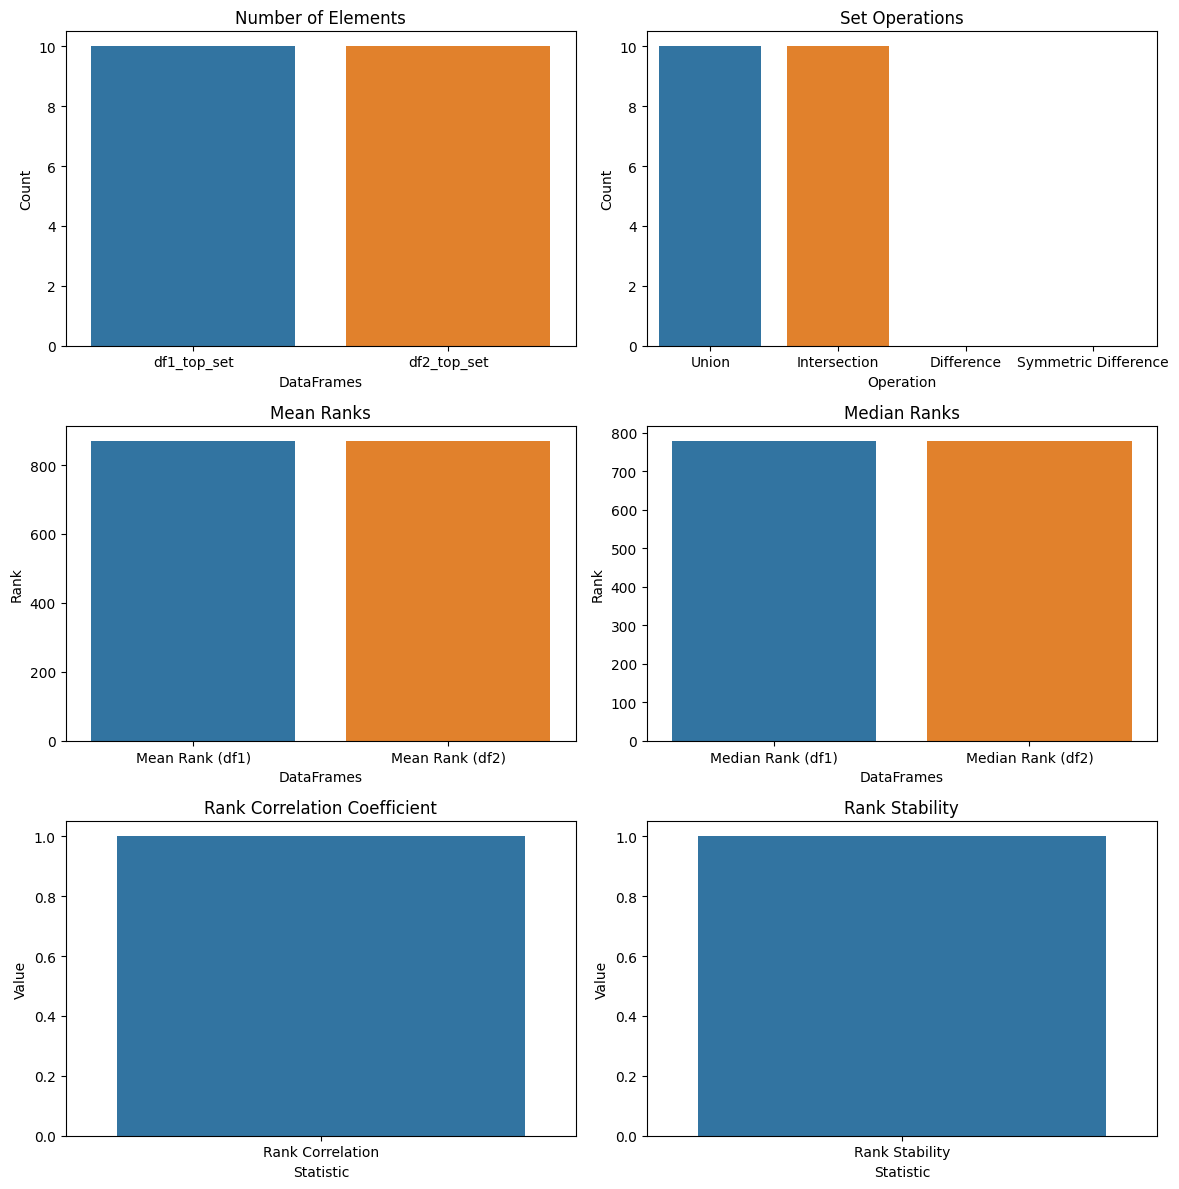

In [47]:
# Calculate the statistics
num_elements_df1 = len(set(df1_top_set))
num_elements_df2 = len(set(df2_top_set))

num_elements_intersection = len(set(df1_top_set).intersection(set(df2_top_set)))
num_elements_union = len(set(df1_top_set).union(set(df2_top_set)))
num_elements_difference = len(set(df1_top_set).difference(set(df2_top_set)))
num_elements_symmetric_difference = len(set(df1_top_set).symmetric_difference(set(df2_top_set)))

mean_rank_df1 = np.mean(list(df1_top_set))
mean_rank_df2 = np.mean(list(df2_top_set))
median_rank_df1 = np.median(list(df1_top_set))
median_rank_df2 = np.median(list(df2_top_set))

# Convert sets to pandas Series
df1_top_series = pd.Series(list(df1_top_set))
df2_top_series = pd.Series(list(df2_top_set))

# Calculate rank correlation coefficient
rank_corr_coef = df1_top_series.corr(df2_top_series)

# Calculate rank stability
rank_stability = df1_top_series.rank().corr(df2_top_series.rank())
df1_top_series = pd.Series(list(df1_top_set))
df2_top_series = pd.Series(list(df2_top_set))

# Calculate rank correlation coefficient
rank_corr_coef = df1_top_series.corr(df2_top_series)

# Calculate rank stability
rank_stability = df1_top_series.rank().corr(df2_top_series.rank())

# Create subplots for each statistic
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plot the number of elements in df1_top_set and df2_top_set
sns.barplot(ax=axes[0, 0], x=['df1_top_set', 'df2_top_set'], y=[num_elements_df1, num_elements_df2])
axes[0, 0].set_title('Number of Elements')
axes[0, 0].set_xlabel('DataFrames')
axes[0, 0].set_ylabel('Count')

# Plot the set operations
sns.barplot(ax=axes[0, 1], x=['Union', 'Intersection', 'Difference', 'Symmetric Difference'], y=[num_elements_union, num_elements_intersection, num_elements_difference, num_elements_symmetric_difference])
axes[0, 1].set_title('Set Operations')
axes[0, 1].set_xlabel('Operation')
axes[0, 1].set_ylabel('Count')

# Plot the mean ranks
sns.barplot(ax=axes[1, 0], x=['Mean Rank (df1)', 'Mean Rank (df2)'], y=[mean_rank_df1, mean_rank_df2])
axes[1, 0].set_title('Mean Ranks')
axes[1, 0].set_xlabel('DataFrames')
axes[1, 0].set_ylabel('Rank')

# Plot the median ranks
sns.barplot(ax=axes[1, 1], x=['Median Rank (df1)', 'Median Rank (df2)'], y=[median_rank_df1, median_rank_df2])
axes[1, 1].set_title('Median Ranks')
axes[1, 1].set_xlabel('DataFrames')
axes[1, 1].set_ylabel('Rank')

# Plot the rank correlation coefficient
sns.barplot(ax=axes[2, 0], x=['Rank Correlation'], y=[rank_corr_coef])
axes[2, 0].set_title('Rank Correlation Coefficient')
axes[2, 0].set_xlabel('Statistic')
axes[2, 0].set_ylabel('Value')

# Plot the rank stability
sns.barplot(ax=axes[2, 1], x=['Rank Stability'], y=[rank_stability])
axes[2, 1].set_title('Rank Stability')
axes[2, 1].set_xlabel('Statistic')
axes[2, 1].set_ylabel('Value')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()